<a href="https://colab.research.google.com/github/timberking2/Machine_Learning/blob/main/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Задание по практике 2

In [187]:
#!pip install pandas
#!pip install seaborn

In [188]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

##Введение в описательную статистику

1. Выберите категориальную целевую переменную (**Y**)

2. Выберите переменную для анализа относительно категории (**X**)

3. Выведитие обобщенную статистическую информацию переменной (**X**)

2. Вычислите среднее, медиану, моду, минимум, максимум, стандартное отклонение относительно целевой пременной из файла Classification datasets в соответствии с вашим вариантом

3. Сделайте вывод относительно полученных результатов

p.s если у вас нет категориальных признаков - преобразуйте любой числовой в категориальный (https://pandas.pydata.org/docs/reference/api/pandas.cut.html). Важно **не** использовать преобразованный Y вместе с этим же X (то есть, если вы преобразовали возраст в категорию, то вы не моежет использовать возраст в качестве X и возраст категорию в качестве Y)

In [189]:
df = pd.read_csv("ca_offenses_by_city.csv") # чтение файла
df

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition),Rape (legacy definition),Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson
0,Adelanto,"33,005",212,2,14,NaN,48,148,808,434,254,120,24
1,Agoura Hills,"20,970",15,0,1,NaN,6,8,310,82,217,11,0
2,Alameda,"78,613",148,2,7,NaN,61,78,"1,819",228,"1,245",346,18
3,Albany,"19,723",34,1,6,NaN,16,11,605,95,447,63,0
4,Alhambra3,"86,175",168,1,13,NaN,74,80,"1,929",305,"1,413",211,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,Yountville3,"3,030",7,0,0,NaN,0,7,46,7,36,3,0
456,Yreka,"7,507",47,1,4,NaN,4,38,309,85,188,36,1
457,Yuba City,"65,974",216,0,28,NaN,66,122,"1,792",429,"1,160",203,14
458,Yucaipa,"53,498",94,2,8,NaN,22,62,"1,309",263,838,208,12


In [190]:
#убираем наны, запятые, делаем круто (спасибо Ване)
df = df.drop(['Rape (legacy definition)'], axis=1)
for col in df.columns:
  if col == 'City':
    continue
  df[col] = df[col].astype(str).str.replace(',','')
for col in df.columns:
  if col == 'City':
    df[col].astype("category")
    continue
  df[col] = df[col].astype('Float64')

In [191]:
df

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition),Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson
0,Adelanto,33005.0,212.0,2.0,14.0,48.0,148.0,808.0,434.0,254.0,120.0,24.0
1,Agoura Hills,20970.0,15.0,0.0,1.0,6.0,8.0,310.0,82.0,217.0,11.0,0.0
2,Alameda,78613.0,148.0,2.0,7.0,61.0,78.0,1819.0,228.0,1245.0,346.0,18.0
3,Albany,19723.0,34.0,1.0,6.0,16.0,11.0,605.0,95.0,447.0,63.0,0.0
4,Alhambra3,86175.0,168.0,1.0,13.0,74.0,80.0,1929.0,305.0,1413.0,211.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
455,Yountville3,3030.0,7.0,0.0,0.0,0.0,7.0,46.0,7.0,36.0,3.0,0.0
456,Yreka,7507.0,47.0,1.0,4.0,4.0,38.0,309.0,85.0,188.0,36.0,1.0
457,Yuba City,65974.0,216.0,0.0,28.0,66.0,122.0,1792.0,429.0,1160.0,203.0,14.0
458,Yucaipa,53498.0,94.0,2.0,8.0,22.0,62.0,1309.0,263.0,838.0,208.0,12.0


In [192]:
df.describe()

,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition),Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson
count,460.0,460.0,460.0,460.0,460.0,460.0,460.0,460.0,460.0,460.0,460.0
mean,70276.995652,298.580435,3.165217,23.202174,101.995652,170.217391,1918.213043,352.671739,1252.043478,313.497826,13.267391
std,212764.653234,1327.284267,14.971101,110.957275,495.037487,721.286288,5733.815467,964.779126,3831.857671,1018.75822,60.293764
min,115.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,2.0,0.0,0.0
25%,12179.5,29.0,0.0,2.0,5.0,18.0,276.0,54.75,170.75,24.75,1.0
50%,32800.0,85.0,1.0,7.0,22.0,49.5,742.0,152.5,488.0,89.0,4.0
75%,74740.75,212.25,2.0,18.0,70.0,128.0,1887.25,342.5,1243.25,287.5,10.0
max,3962726.0,25156.0,282.0,2209.0,8952.0,13713.0,93503.0,16160.0,61191.0,16152.0,1131.0


In [193]:
df['Violent crime'].describe()

count          460.0
mean      298.580435
std      1327.284267
min              0.0
25%             29.0
50%             85.0
75%           212.25
max          25156.0
Name: Violent crime, dtype: Float64

In [194]:
df.dtypes

City                                     object
Population                              Float64
Violent crime                           Float64
Murder and nonnegligent manslaughter    Float64
Rape (revised definition)               Float64
Robbery                                 Float64
Aggravated assault                      Float64
Property crime                          Float64
Burglary                                Float64
Larceny-theft                           Float64
Motor vehicle theft                     Float64
Arson                                   Float64
dtype: object

In [195]:
df['Violent crime'] = pd.qcut(df['Violent crime'], 4, labels=["Peacefuel","Somebody dies",'Lot guys are dies', 'Yooo blood bathhh'])

df

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition),Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson
0,Adelanto,33005.0,Lot guys are dies,2.0,14.0,48.0,148.0,808.0,434.0,254.0,120.0,24.0
1,Agoura Hills,20970.0,Peacefuel,0.0,1.0,6.0,8.0,310.0,82.0,217.0,11.0,0.0
2,Alameda,78613.0,Lot guys are dies,2.0,7.0,61.0,78.0,1819.0,228.0,1245.0,346.0,18.0
3,Albany,19723.0,Somebody dies,1.0,6.0,16.0,11.0,605.0,95.0,447.0,63.0,0.0
4,Alhambra3,86175.0,Lot guys are dies,1.0,13.0,74.0,80.0,1929.0,305.0,1413.0,211.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
455,Yountville3,3030.0,Peacefuel,0.0,0.0,0.0,7.0,46.0,7.0,36.0,3.0,0.0
456,Yreka,7507.0,Somebody dies,1.0,4.0,4.0,38.0,309.0,85.0,188.0,36.0,1.0
457,Yuba City,65974.0,Yooo blood bathhh,0.0,28.0,66.0,122.0,1792.0,429.0,1160.0,203.0,14.0
458,Yucaipa,53498.0,Lot guys are dies,2.0,8.0,22.0,62.0,1309.0,263.0,838.0,208.0,12.0


In [196]:
df.head(15)

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition),Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson
0,Adelanto,33005.0,Lot guys are dies,2.0,14.0,48.0,148.0,808.0,434.0,254.0,120.0,24.0
1,Agoura Hills,20970.0,Peacefuel,0.0,1.0,6.0,8.0,310.0,82.0,217.0,11.0,0.0
2,Alameda,78613.0,Lot guys are dies,2.0,7.0,61.0,78.0,1819.0,228.0,1245.0,346.0,18.0
3,Albany,19723.0,Somebody dies,1.0,6.0,16.0,11.0,605.0,95.0,447.0,63.0,0.0
4,Alhambra3,86175.0,Lot guys are dies,1.0,13.0,74.0,80.0,1929.0,305.0,1413.0,211.0,6.0
5,Aliso Viejo,50751.0,Somebody dies,0.0,5.0,3.0,24.0,363.0,53.0,276.0,34.0,1.0
6,Alturas3,2566.0,Somebody dies,0.0,13.0,2.0,20.0,61.0,9.0,48.0,4.0,4.0
7,American Canyon3,20687.0,Somebody dies,1.0,7.0,21.0,29.0,634.0,97.0,493.0,44.0,2.0
8,Anaheim3,349471.0,Yooo blood bathhh,18.0,129.0,439.0,685.0,10038.0,1476.0,6893.0,1669.0,28.0
9,Anderson,10277.0,Lot guys are dies,0.0,4.0,9.0,75.0,474.0,60.0,358.0,56.0,2.0


# Категориальная переменная У
# Переменная для анализа - Population

In [197]:
df['Population'].describe(include='all')

count            460.0
mean      70276.995652
std      212764.653234
min              115.0
25%            12179.5
50%            32800.0
75%           74740.75
max          3962726.0
Name: Population, dtype: Float64

In [198]:
mean = df.groupby('Violent crime')['Population'].mean()
mean

Violent crime
Peacefuel              10393.12069
Somebody dies          28719.87931
Lot guys are dies     53757.513274
Yooo blood bathhh    188832.269565
Name: Population, dtype: Float64

In [199]:
median = df.groupby('Violent crime')['Population'].median()
median

Violent crime
Peacefuel              7499.0
Somebody dies         24235.5
Lot guys are dies     44033.0
Yooo blood bathhh    103590.0
Name: Population, dtype: Float64

In [200]:
mode = df.groupby('Violent crime')['Population'].agg(pd.Series.mode)
mode

Violent crime
Peacefuel            [115.0, 339.0, 680.0, 705.0, 834.0, 894.0, 983...
Somebody dies        [206.0, 2566.0, 2836.0, 3833.0, 4779.0, 4856.0...
Lot guys are dies    [6580.0, 10277.0, 11470.0, 11549.0, 12883.0, 1...
Yooo blood bathhh    [23700.0, 28416.0, 30290.0, 36256.0, 36395.0, ...
Name: Population, dtype: object

In [201]:
min = df.groupby('Violent crime')['Population'].min()# (минимум) ваш код здесь
min

Violent crime
Peacefuel              115.0
Somebody dies          206.0
Lot guys are dies     6580.0
Yooo blood bathhh    23700.0
Name: Population, dtype: Float64

In [202]:
max = df.groupby('Violent crime')['Population'].max()# (максимум) ваш код здесь
max

Violent crime
Peacefuel              76081.0
Somebody dies         109495.0
Lot guys are dies     258198.0
Yooo blood bathhh    3962726.0
Name: Population, dtype: Float64

In [203]:
std = df.groupby('Violent crime')['Population'].std()# (стандартное отклонение) Ваш код здесь
std

Violent crime
Peacefuel             10771.423705
Somebody dies         20231.734659
Lot guys are dies     40398.812929
Yooo blood bathhh    400346.923597
Name: Population, dtype: float64

Вычислите следующие квантили: 25%, 50% (медиана), 75% для числового признака вашего датасета. Затем найдите интерквартильный размах.

In [204]:
q1 = df.groupby('Violent crime')['Population'].quantile(0.25) #(25% квантиль) ваш код здесь
q1

Violent crime
Peacefuel             3699.0
Somebody dies        13586.5
Lot guys are dies    26023.0
Yooo blood bathhh    74833.5
Name: Population, dtype: float64

In [205]:
q2 = df.groupby('Violent crime')['Population'].quantile(0.50) #(50% квантиль) ваш код здесь
q2

Violent crime
Peacefuel              7499.0
Somebody dies         24235.5
Lot guys are dies     44033.0
Yooo blood bathhh    103590.0
Name: Population, dtype: float64

In [206]:
q3 = df.groupby('Violent crime')['Population'].quantile(0.75) #(75% квантиль) ваш код здесь
q3

Violent crime
Peacefuel             12902.50
Somebody dies         37694.25
Lot guys are dies     67325.00
Yooo blood bathhh    160854.00
Name: Population, dtype: float64

In [207]:
iqr = q3 - q1 #(интерквартильный размах) ваш код здесь
iqr

Violent crime
Peacefuel             9203.50
Somebody dies        24107.75
Lot guys are dies    41302.00
Yooo blood bathhh    86020.50
Name: Population, dtype: float64

In [208]:
df.groupby('Violent crime')['Population'].describe()

,count,mean,std,min,25%,50%,75%,max
Violent crime,,,,,,,,
Peacefuel,116.0,10393.12069,10771.423705,115.0,3699.0,7499.0,12902.5,76081.0
Somebody dies,116.0,28719.87931,20231.734659,206.0,13586.5,24235.5,37694.25,109495.0
Lot guys are dies,113.0,53757.513274,40398.812929,6580.0,26023.0,44033.0,67325.0,258198.0
Yooo blood bathhh,115.0,188832.269565,400346.923597,23700.0,74833.5,103590.0,160854.0,3962726.0


Какие выводы можно сделать исходя из полученных статистических данных?

**Ответ здесь**

Видим, что датасет откровенно говоря плоховаст, анализу поддаётся тяжеловато, но попытаться собрать костыли можно.
Также, что в Lot guys are dies городах имеется высокая преступность.
Много данных имеет выбросы, которые мешают сделать их категориальными



##Основы визуализации

 Постройте гистограмму переменной (X) относительно категориального признака (Y) из своего датасета.

In [209]:
fig = px.histogram(df, y='Violent crime', x='Population', barmode='group', text_auto=True, color_discrete_sequence=px.colors.qualitative.Alphabet) #Найденное решение из библы plotly
fig.update_yaxes(categoryorder='total ascending')

На графике гистограммы можно увидеть распределение популяции относительно количества преступлений. Также можно сделать вывод, что самыми густонаселёнными городами являются те, в которых кровавая баня (Больше убийств)((Что логично)).

Постройте boxplot любого признака из своего датасета.

1) boxplot числовой переменной;

2) boxplot числовой переменной относительно категориальный переменной;

*p.s. Если у вас только один числовой признак, преобразуйте категориальный при помощи LabelEncoder (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)*

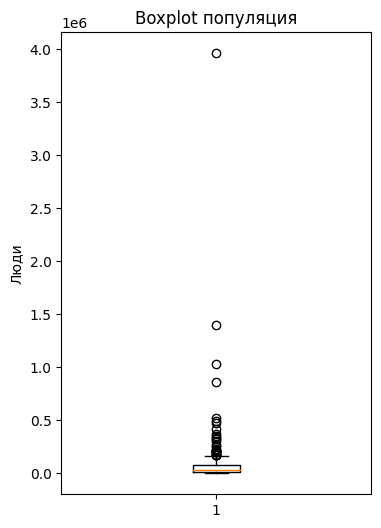

In [210]:
plt.figure(figsize=(4, 6))
plt.boxplot(df['Population'])
plt.title('Boxplot популяция')
plt.ylabel('Люди')
plt.show()

<Axes: xlabel='Violent crime', ylabel='Population'>

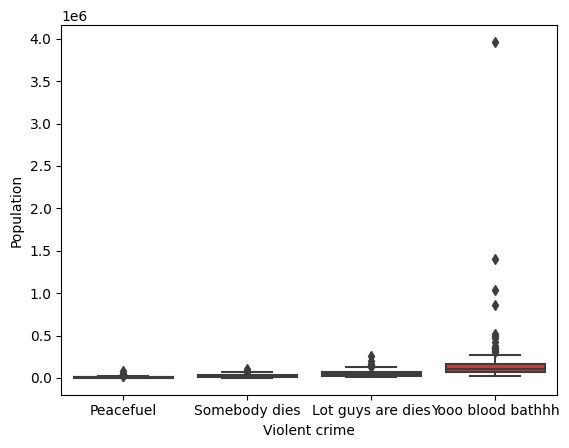

In [211]:
sns.boxplot(x=df["Violent crime"], y=df["Population"])

Смотря на количество преступлений в разных по населению городах, можно сказать, что с увеличением количества убийств - увеличивается и медиана количества населения) Также в каждом типе убийств есть аномалии.

Постройте диаграмму рассеивания для числовых признаков вашего датасета.

*p.s. Если у вас только один числовой признак, преобразуйте категориальный при помощи LabelEncoder (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)*

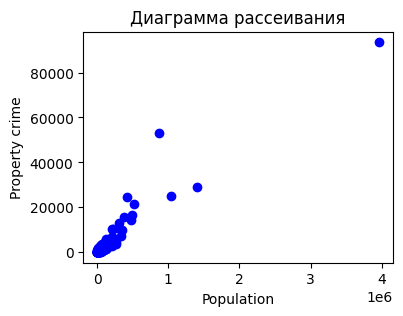

In [212]:
plt.figure(figsize=(4, 3))
plt.scatter(df['Population'], df['Property crime'], color='blue')
plt.title('Диаграмма рассеивания')
plt.xlabel('Population')
plt.ylabel('Property crime')
plt.show()
#Прикольно, концентрация везде такая "doin brrrr" и в углу шарик такой один (аномалия)

Можно увидеть, что количество преступлений против собственности сконцентрировано в городах с населением менее миллиона, а также количество преступлений меньше там, где наименьшее население


Постройте матрицу корреляции для двух числовых признаков вашего датасета.

<Axes: >

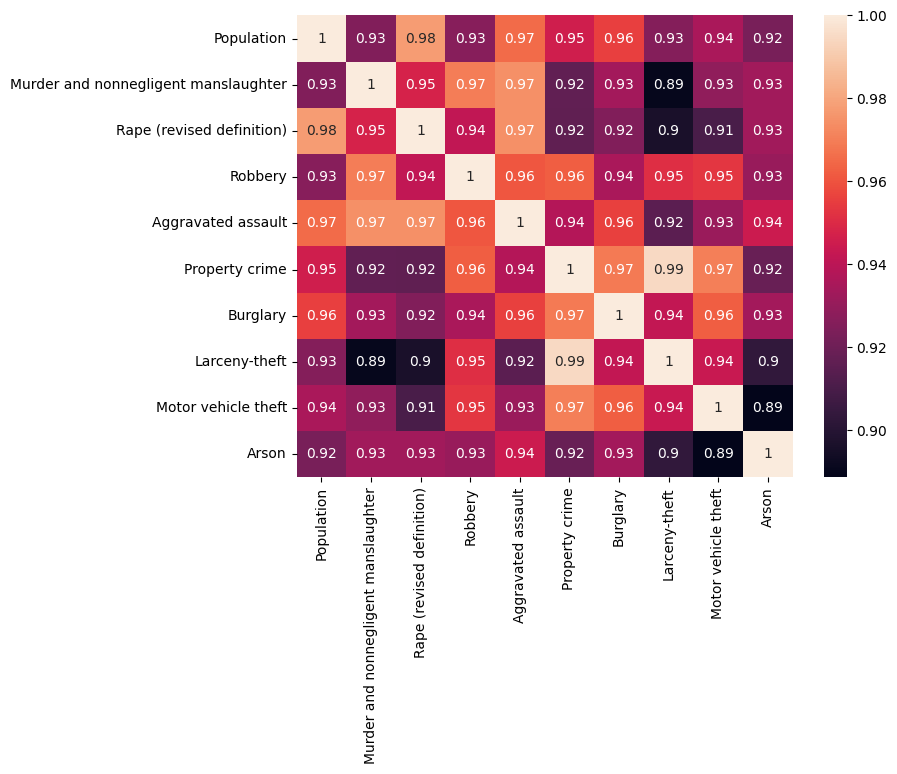

In [218]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True)

In [214]:
corr_matrix = df.corr()#ваш код здесь
corr_matrix #вывод здесь

<ipython-input-214-a1e72e8fed80>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Population,Murder and nonnegligent manslaughter,Rape (revised definition),Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson
Population,1.000000,0.925048,0.977792,0.926847,0.965603,0.945646,0.955595,0.925792,0.935178,0.922679
Murder and nonnegligent manslaughter,0.925048,1.000000,0.947388,0.969541,0.974696,0.916854,0.933636,0.889889,0.928964,0.933018
Rape (revised definition),0.977792,0.947388,1.000000,0.941240,0.974725,0.916252,0.924957,0.896159,0.910216,0.933178
Robbery,0.926847,0.969541,0.941240,1.000000,0.960394,0.962208,0.935264,0.950905,0.953188,0.930809
Aggravated assault,0.965603,0.974696,0.974725,0.960394,1.000000,0.937817,0.955843,0.915038,0.931330,0.944404
Property crime,0.945646,0.916854,0.916252,0.962208,0.937817,1.000000,0.968786,0.994479,0.970247,0.918435
Burglary,0.955595,0.933636,0.924957,0.935264,0.955843,0.968786,1.000000,0.942065,0.962156,0.933636
Larceny-theft,0.925792,0.889889,0.896159,0.950905,0.915038,0.994479,0.942065,1.000000,0.943717,0.902996
Motor vehicle theft,0.935178,0.928964,0.910216,0.953188,0.931330,0.970247,0.962156,0.943717,1.000000,0.888564
Arson,0.922679,0.933018,0.933178,0.930809,0.944404,0.918435,0.933636,0.902996,0.888564,1.000000


Какие выводы можно сделать на основе графиков и матрицы корреляции?

**Ответ здесь**

В данном датасете уровень корреляции очень высок, что позволяет связать между собой почти все переменные, но иногда такой высокий уровень связанности может только сделать хуже.
На гистрогаммах можно увидеть, что в городах с высоким уровнем населения
включают в себя наибольшие значения преступлений. Также присутствует немало аномалий, что порой сильно ломает гистограммы.


##Задание для гениев*

Реализовать следующие методы поиска выбросов:
1. На основе среднего и отклонения
2. Критерий Шовене
3. С помощью квартилей
4. Поиск выбросов по двум переменным

[Посмотреть](http://course.omgtu.ru/wp-content/uploads/2021/04/3_%D0%92%D1%8B%D0%B1%D1%80%D0%BE%D1%81%D1%8B.pdf)

P.S. в качестве возвразаемого значения методов может быть:
1. очищенный датафрейм
2. индексы выбросов ```df.series.index```

In [215]:
"""

Ваш код здесь

"""

'\n\nВаш код здесь\n\n'

### Пример реализации одного метода

In [216]:
from statistics import median, mean

class Outline:
  def __init__(self, df):
    self.df = df

  def delete_outline_by_mean(self, column_name):
    mean_data = mean(self.df[column_name])
    maximum = mean_data * 2
    result = []

    for item in self.df[column_name]:
      if abs(item - mean_data) < maximum:
        result.append(item)

    return result



In [217]:
data = pd.DataFrame(
    data = {
        "col1": [1, 2, 3, 4, 5, 1000],
        "col2": [1, 2, 3, 2, 1, 4]
    }
)

so = Outline(data)
so.delete_outline_by_mean("col1")

[1, 2, 3, 4, 5]